# Chapter 9 機械学習の基礎（教師なし学習）
# 9-1 教師なし学習
## 9-1-1 教師なし学習のモデルの種類

## 9-1-2 この章で使用するライブラリのインポート

In [2]:
# データ加工・処理・分類ライブラリ
import numpy as np
import numpy.random as random
import scipy as scipy
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

%precision 3

'%.3f'

# 9-2 クラスタリング
## 9-2-1 k-means法

## 9-2-2 k-means法でクラスタリングする
### 2-1 訓練データの作成

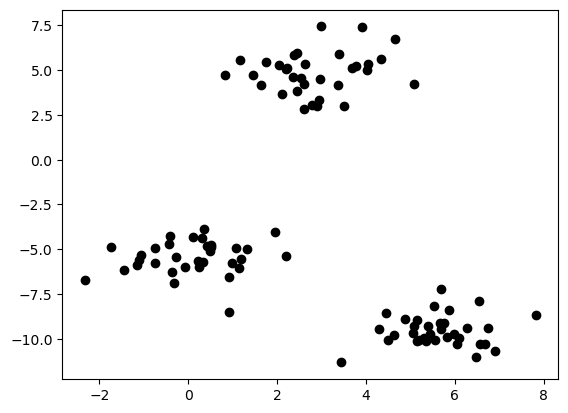

In [3]:
# k-means法を使用するためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsは二つの値を返すため、一方は使用しない"_"で受け取る
X, _ = make_blobs(random_state=10)

# グラフを描画
plt.scatter(X[:, 0], X[:,1], color='black')

### 2-2 KMeansクラスを使ったクラスタリング

In [4]:
# KMeansクラスの可視化
kmeans = KMeans(init='random', n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)

### 2-3 結果の確認

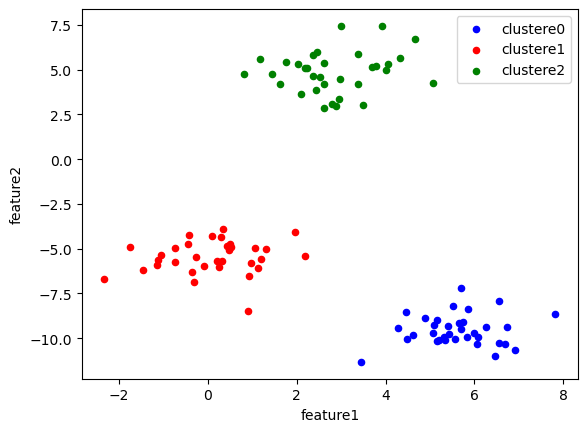

In [5]:
# concatでデータを横に結合（axis=1)を指定
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 上記のデータにて、X軸をfeature1、Y軸をfeature2、クラスター番号をclusterと列名指定
merge_data.columns = ['feature1', 'feature2', 'cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
	ax = data.plot.scatter(x = 'feature1', y = 'feature2', color = colors[i], label = f'clustere{i}', ax=ax)

## 9-2-3 金融マーケティングデータをクラスタリグする
### 3-1 分析要求
### 3-2 分類対象データのダウンロードと読み込み

In [9]:
# webからデータを取得したり、zipファイルを扱うためのライブラリ
import requests, zipfile
import io

# データがあるurl指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [10]:
# 対象データを読み込み
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 3-3 データの整理と標準化

In [11]:
print('データの形式(x,y):{}'.format(bank.shape))
print('欠損データの数:{}'.format(bank.isnull().sum().sum()))

データの形式(x,y):(45211, 17)
欠損データの数:0


In [12]:
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
bank_sub = bank[['age', 'balance', 'campaign', 'previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


### 3-4 クラスタリング処理


cluster_number
4    14454
0    23791
3     1286
2     3781
5      525
1     1374
Name: count, dtype: int64


Text(0, 0.5, 'count')

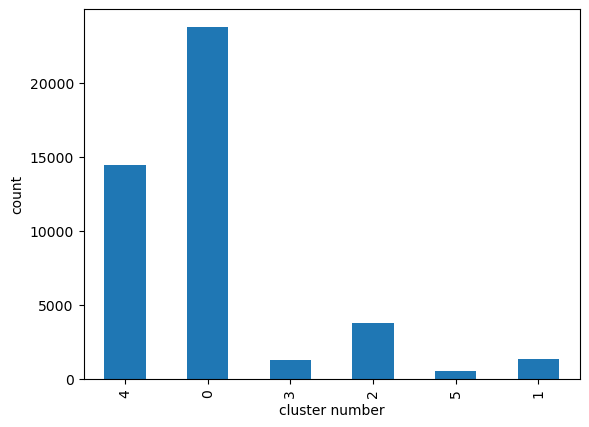

In [13]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(bank_sub_std)
# クラスターの番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')
# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

## 9-2-4 エルボー法によるクラスター数の推定

Text(0, 0.5, 'Distortion')

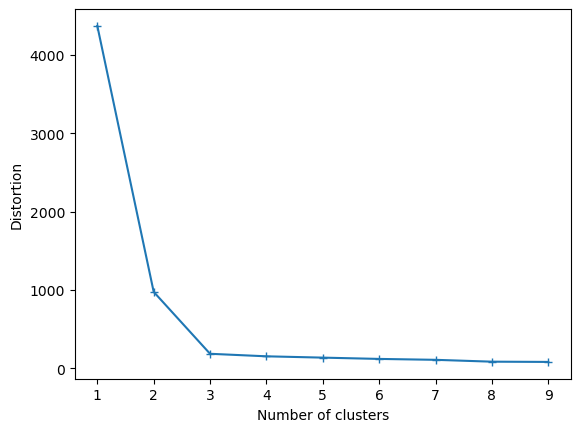

In [15]:
# エルボー法による推定。クラスターを1から10に増やして、それぞれの距離の総和を求める
dist_list = []
for i in range(1,10):
	kmeans = KMeans(n_clusters=i, init='random', random_state=0)
	kmeans.fit(X)
	dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

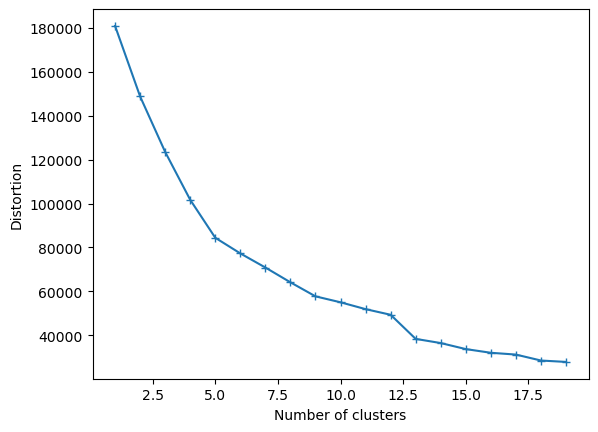

In [16]:
# エルボー法による推定。クラスターを1から20に増やして、それぞれの距離の総和を求める
dist_list = []
for i in range(1,20):
	kmeans = KMeans(n_clusters=i, init='random', random_state=0)
	kmeans.fit(bank_sub_std)
	dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

## 9-2-5 クラスタリング結果の解釈

In [18]:
# 金融機関のデータにクラスター番号のデータを結合
bank_with_cluster = pd.concat([bank, labels], axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [ ]:
# 分割のための区切りを設定
bins = [15,20,25,30,35,40,50,55,60,65,100]

# 上の区切りをもとに金融機関のデータを分割
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定